# Изучение закономерностей, определяющих успешность игр

<b>Заказчик исследования:</b> интернет-магазин «Стримчик» (продажа компьютерных игр).

<b>Цель проекта:</b> на основе исторических данных из открытых источников необходимо выявить закономерности, характеризующие успешность компьютерных игр, для определения потенциально популярного продукта и планирования рекламных кампаний.

<b>Этапы реализации проекта:</b>

[1. Подготовительный этап: загрузка библиотек, выгрузка данных, изучение общей информации о датафрейме, построение первичных гистограмм](#preparing)

[2. Этап предобработки данных: замена названия столбцов, заполнение пропусков, выявление и исключение аномалий, преобразование в нужные типы, расширение данных (добавление столбца с информацией о суммарных продажах в регионах)](#preprocessing)

[3. Проведение исследовательского анализа данных:](#research)

- [3.1. Изучение и описание динамики выхода игр в разные годы;](#research_years)

- [3.2. Изучение и описание динамики продаж по платформам в разные годы, построение распределения платформ с наибольшими суммарными продажами;](#research_platforms)

- [3.3. Выбор исследуемого периода для построения прогноза на 2017 год;](#research_period)

- [3.4. Изучение и выявление потенцально прибыльных платформ;](#research_benefit)

- [3.5. Построение и описание диаграммы размаха по по глобальным продажам игр в разбивке по платформам;](#research_boxplot)

- [3.6. Изучение и описание влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков, построение диаграммы рассеивания, выявление корреляции;](#research_one_platform)

- [3.7. Соотнесение полученных выводов с продажами игр на других платформах;](#research_another_platform)

- [3.8. Изучение и описание общего распределения игр по жанрам, в том числе исходя из критериев прибыльности и продаж.](#research_benefit_platforms)

[4. Составление портрета пользователя каждого региона (Северная Америка, Европа, Япония):](#regions)

- [4.1. Выявление самых популярных платформ (топ-5), описание различия в долях продаж;](#regions_platforms)

- [4.2. Выявление самых популярных жанров (топ-5), описание различия;](#regions_genres)

- [4.3. Выявление влияния рейтинга ESRB на продажи в отдельном регионе.](#regions_rating)

[5. Формулирование и проверка гипотез: ](#hypotheses)

- [5.1. Гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;](#first_hypothesis)

- [5.2. Гипотеза 2: редние пользовательские рейтинги жанров Action и Sports разные.](#second_hypothesis)


[6. Формирование общего вывода и рекомендаций по итогам исследования.](#conclusion)




<a id="preparing"> </a>

## Подготовительный этап: загрузка библиотек, выгрузка данных, изучение общей информации о датафрейме, построение первичных гистограмм.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
#создадим палитиру

palette = sns.cubehelix_palette(start=.6, rot=-.75)

In [3]:
#открываем файл, разделяем столбцы

df = pd.read_csv('/datasets/games.csv', sep=',')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#установим предельное число столбцов для отображения

pd.options.display.max_columns = 20

In [5]:
#выведем общую информацию о таблице 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


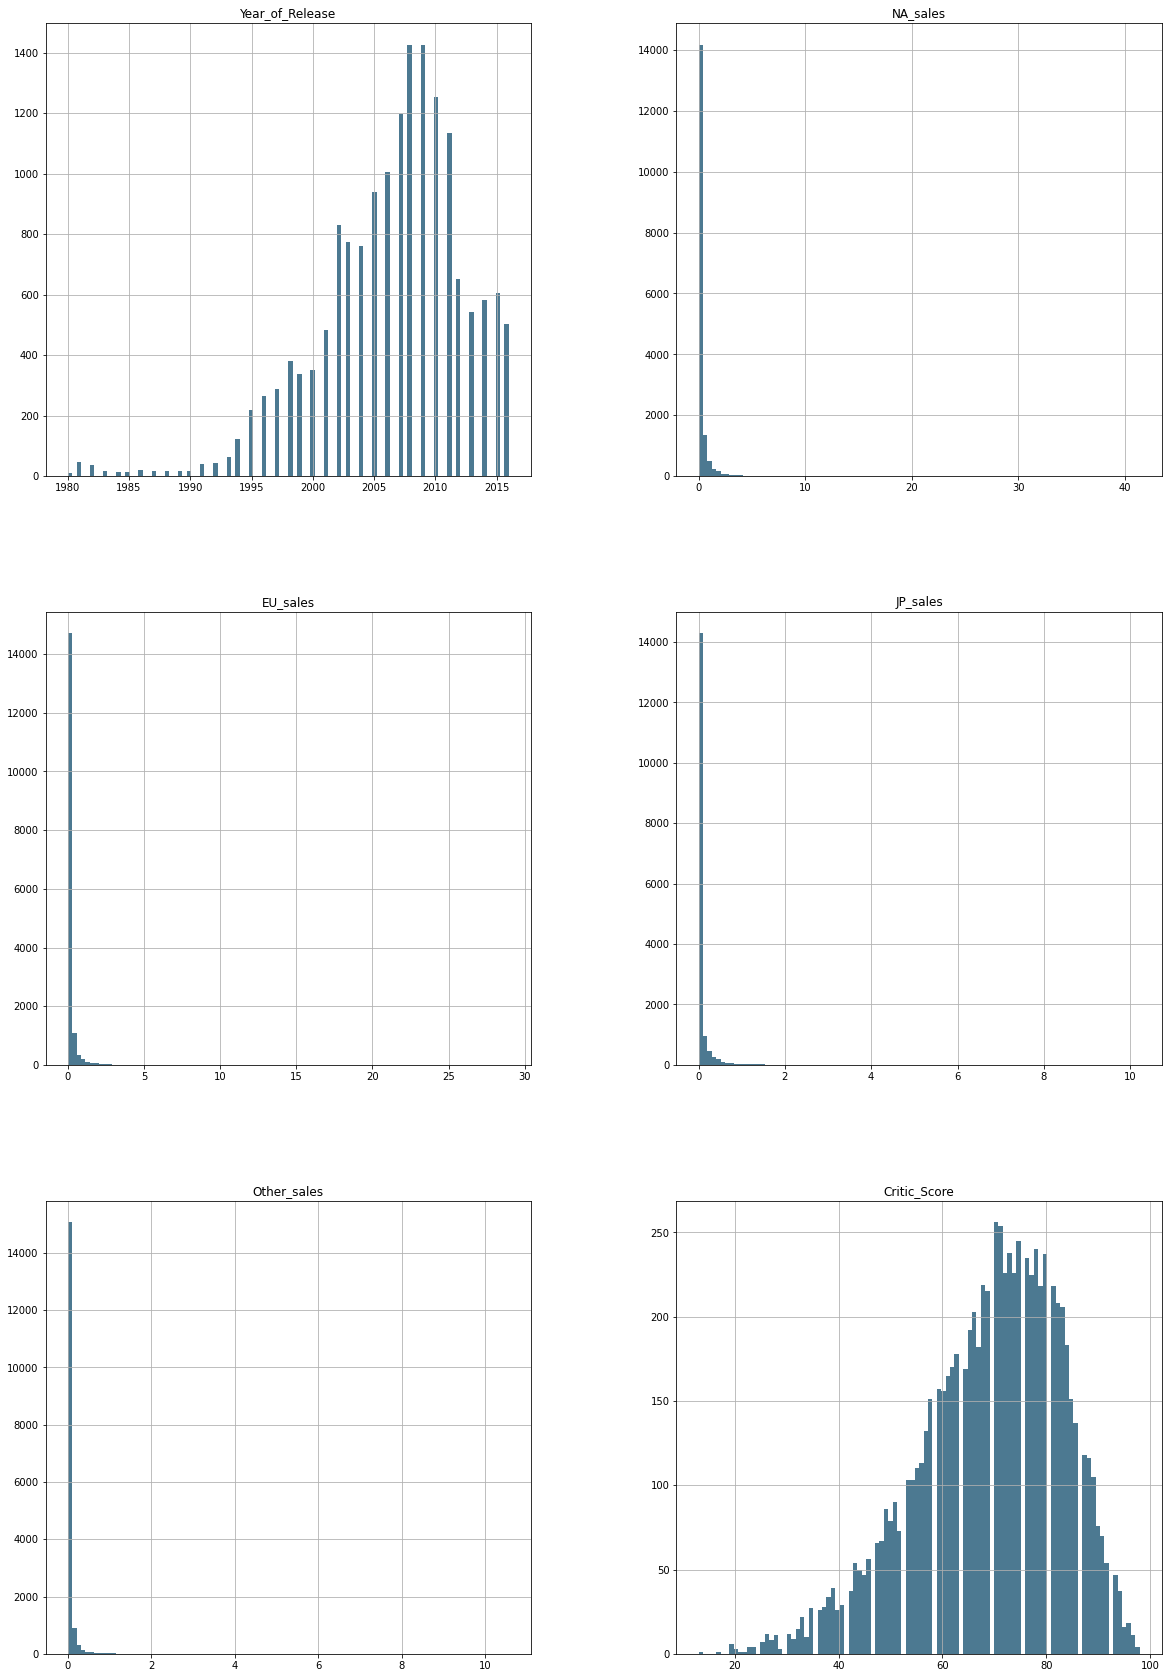

In [6]:
#построим общую гистограмму для всех столбцов таблицы, чтобы ознакомиться с данными

df.hist(figsize=(20, 30), bins=100, color=palette[3]);

В ходе построения гистограммы для датафрейма целиком получены следующие предварительные данные:
1) Больше всего игр вышло в конце 2010 годов: с началом нового десятилетия количество выпущенных в год игр стало резко снижаться;

2) Медианная оценка критиков находится около показателя 70;

3) Предварительные гистограммы о продажах по регионам свидетельствуют о том, что большая часть игр продается небольшим тиражом, лучше всего игры с большим числом копий продаются в Северной Америке и Европе, хуже - в Японии и остальном мире. 

Данные столбцы в дальнейшем будут изучены более подробно. 

<b>Вывод по этапу.</b>

В ходе выгрузки таблицы получены данные, сгруппированные по следующим столбцам:

- Name — название игры;
- Platform — платформа;
- Year_of_Release — год выпуска;
- Genre — жанр игры;
- NA_sales — продажи в Северной Америке (миллионы проданных копий);
- EU_sales — продажи в Европе (миллионы проданных копий);
- JP_sales — продажи в Японии (миллионы проданных копий);
- Other_sales — продажи в других странах (миллионы проданных копий);
- Critic_Score — оценка критиков (максимум 100);
- User_Score — оценка пользователей (максимум 10);
- Rating — рейтинг от организации ESRB с определением возрастной категории.

Размерность таблицы: 16715 строк, 11 столбцов.

Тип содержимого: 5 столбцов (наименование, платформа, жанр, рейтинг и оценка пользователя) имеют тип object, остальные столбцы с численными данными - с плавающей точкой. Особое внимание стоит обратить на столбец «User_Score», тип которого не является числовым. 

Большинство столбцов (6 из 11) имеют пропуски. 

<a id="preprocessing"> </a>
## Этап предобработки данных: замена названия столбцов, заполнение пропусков, выявление и исключение аномалий, преобразование в нужные типы, расширение данных (добавление столбца с информацией о суммарных продажах в регионах)

In [7]:
#проверим названия столбцов на предмет наличия лишних пробелов

df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
#пробелов нет, переведем наименования столбцов в нижний регистр для соответствия змеиному регистру 

df.columns = df.columns.str.lower()

df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Столбцы "name", "genre", "platform" и "rating" содержат наименования с заглавными буквами. Проверим, позволит ли перевод столбцов в нижний регистр избежать появления дубликатов или стоит оставить оригинальное написание данных, содержищихся в них.

In [9]:
#создадим функцию, которая проверит разницу в уникальности столбцов с верхним и нижним регистром и применим ее 

def to_lower(data):
    if len(data.unique()) == len(data.str.lower().unique()):
        return f'{data.name}: дубликатов нет'
    return f'{data.name}: выявлены дубликаты'

for column in ['name', 'genre', 'platform', 'rating']:
    print(to_lower(df[column]))

name: дубликатов нет
genre: дубликатов нет
platform: дубликатов нет
rating: дубликатов нет


Дубликаты не обнаружены, оставим столбцы в имеющемся регистре. Однако, в столбцах могут иметься пробелы в написании по краям. Избавимся от возможных пробелов. 

In [10]:
#удалим пробелы в столбцах

df = df.apply(lambda x: x.apply(lambda y: y.strip() if type(y) == type('') else y), axis=0)

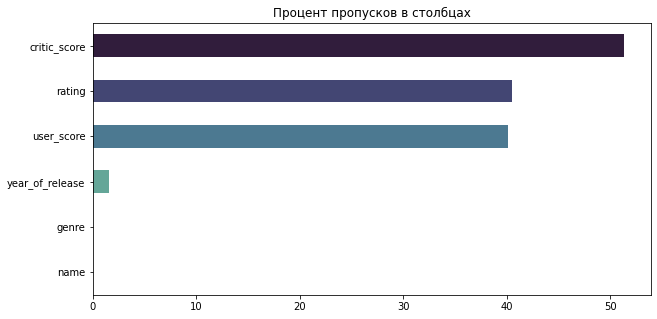

In [11]:
#визуализируем процент пропусков в каждом столбце        
(
    (df.isna().mean()*100)
    .to_frame()
    .rename(columns = {0:'space'})
    .query('space > 0')
    .sort_values(by = 'space', ascending = True)
    .plot(kind= 'barh', y='space', figsize=(10,5), legend = False,
         color=palette)
    .set_title('Процент пропусков в столбцах')    
);

В столбце с оценкой критиков пропущено более половины значений, в столбцах с рейтингом игры и оценкой пользователей - чуть более сорока %. Пропуски в столбцах "жанр" и "наименование" крайне незначительны (по 2 пропуска), что даже не отображаются на графике. 

In [12]:
#выведем информацию о столбцах с наименьшим количеством пропусков 

df.query('name.isna() or genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные строки не дают нам понимания, какие игры скрываются за ними. Удалим их из датафрейма.

In [13]:
#исключаем строки и проверяем результат 

display(f'количество строк до удаления: {df.shape[0]}')


df = df.drop([659, 14244],axis = 0)

'количество строк до удаления: 16715'

In [14]:
f'новое количество строк: {df.shape[0]}, строк с пропусками в стобцах "жанр" и "наименование":\
{len(df.loc[(df["name"].isna()) | (df["genre"].isna())])}'

'новое количество строк: 16713, строк с пропусками в стобцах "жанр" и "наименование":0'

Следующий столбец по числу пропусков - год выпуска игры.

In [15]:
#уточним точное число пропусков в столбце 

df['year_of_release'].isna().sum()

269

In [16]:
#уточним, как много пропусков года выпуска имеется для игр, выходящих на разных платформах

df.loc[df['name'].duplicated(keep = False) == True]['year_of_release'].isna().sum()

146

Полученные данные продемонстрировали, что из 269 игры, год выпуска которых не указан, 146 имеют аналоги, выпущенные на других платформах. Однако, для некоторых игр может быть неизвестен период выхода в целом, а год выпуска одной и той же игры может отличаться для разных платформ (или игра может переиздаваться с разницой в несколько лет). Ввиду этого, уточнить точный год релиза игры не представляется возможным. Оставим пропуски. 

In [17]:
#приведем столбец к целочисленному значению: год не может быть дробным 

df['year_of_release'] = df['year_of_release'].astype('Int64')

df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Следующие два столбца по числу пропусков - рейтинг и оценка пользователя, содержащие примерно по 40% пропусков.

In [18]:
#уточним точное число пропусков в столбцах

display(f'пропусков в столбце user_score: {df["user_score"].isna().sum()}')
f'пропусков в столбце rating: {df["rating"].isna().sum()}'

'пропусков в столбце user_score: 6699'

'пропусков в столбце rating: 6764'

In [19]:
#уточним, какие уникальные данные имеются в столбце: оценка должна варьироваться от единицы до 10 баллов

df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [20]:
len(df.query('user_score == "tbd"'))

2424

В столбце с оценкой пользователей имеются несколько подозрительных значений: ноль и tbd. Как правило, в английском языке аббревиатурой "TBD" обозначают отсутствующую на данный момент информацию (to be determined / decided / declared - будет определено / решено / объявлено позднее). Эти данные ничем не отличаются от NaN, однако, не позволяют совершать сравнительных операций с таблицей. Заменим все tbd на NaN и приведем столбец к значению "float": данные в столбце имеют дробное значение, но сейчас они имеют строковый тип. 

In [21]:
#произведем замену tbd на пропуски 

df['user_score'] = df['user_score'].replace({'tbd': np.nan}) 
display(f'пропусков в столбце user_score: {df["user_score"].isna().sum()}')

'пропусков в столбце user_score: 9123'

In [22]:
#приведем столбец к дробному значению для возможности совершения операций с числами

df['user_score'] = df['user_score'].astype('float64')

df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [23]:
#уточним, какие игры имеют рейтинг менее единицы

df.query('user_score < 1')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.00,0.0,0.06,NaN,0.0,E
5764,Happy Feet,DS,2006,Action,0.27,0.01,0.0,0.02,NaN,0.3,E
8265,Madden NFL 17,X360,2016,Sports,0.14,0.02,0.0,0.02,NaN,0.7,E
9147,Power Gig: Rise of the SixString,PS3,2010,Misc,0.13,0.00,0.0,0.01,36.0,0.5,T
9970,Madden NFL 17,PS3,2016,Sports,0.07,0.02,0.0,0.02,NaN,0.2,E
10262,Charlie and the Chocolate Factory,XB,2005,Adventure,0.08,0.02,0.0,0.00,39.0,0.5,E
10482,Thrillville: Off the Rails,PSP,2007,Strategy,0.09,0.00,0.0,0.01,72.0,0.6,E10+
10726,Dragon Ball: Evolution,PSP,2009,Fighting,0.09,0.00,0.0,0.01,28.0,0.9,T
12398,Johnny Test,DS,2011,Platform,0.06,0.00,0.0,0.00,NaN,0.9,E
13380,Billy the Wizard: Rocket Broomstick Racing,Wii,2007,Racing,0.04,0.00,0.0,0.00,NaN,0.3,E


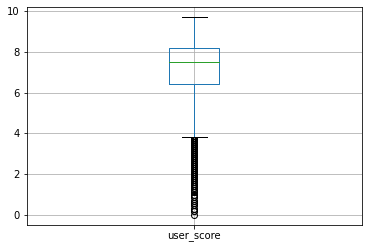

In [24]:
#построим диаграмму размаха, чтобы узнать, являются ли такие значения выбросами

df.boxplot(column='user_score');

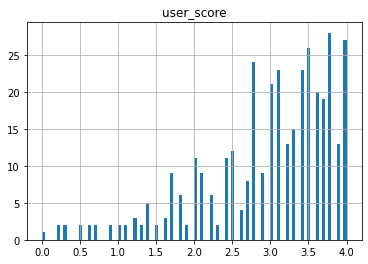

In [25]:
#для наглядности отразим распределение оценок в зоне выбросов на гистограмме

df.hist(column='user_score', bins=100, range=(0, 4));

Оценка менее нуля вызывает подозрение: обычно минимальная оценка составляет от единицы, а получить значение 0.2 или 0.3 за игру представляется непростой задачей. У большинства игр в данной выборке не указаны оценки критиков, но некоторые, например, как Thrillville: Off the Rails имеют довольно неплохой экспертный рейтинг, а, следовательно, игра не может иметь столь низкую пользовательскую оценку. Вероятно, часть данных в этом столбце ошибочна (например, вместо 0.2. должно быть 2) или формат рейтинга на сайте, с которого они получены, отличается. Диаграмма распределения считает выбросами все значения ниже 4, но мы исправим только нереалистичные значения менее нуля, заменив их на NaN, т.к. точный рейтинг данных игр установить не удастся. 

In [26]:
#произведем замену оценок менее единицы на пропуски 

df.loc[df['user_score'] < 1, 'user_score'] = np.nan

display(f'пропусков в столбце user_score: {df["user_score"].isna().sum()}')

'пропусков в столбце user_score: 9136'

In [27]:
#выведем процент пропусков в столбце 

df['user_score'].isna().mean()*100

54.664033985520255

После замены рейтинга близкого к нулю и tbd на NaN более половины значений в столбце оказались пропущенными. К сожалению, для оценки влияния рейтинга на продажи придется работать только с выборкой, где указан рейтинг: заменить корректно такой объем пропусков не представляется возможным, а замена по имеющемуся рейтингу на других платформах или рейтингу критиков некорректа: игры для разных платформ могут иметь различные проблемы, которые влияют на оценку игры, а мнение экспертов зачастую сильно расходится с мнением рядовых пользователей. 

Тем временем, вернемся к столбцу с возрастным рейтингом.

In [28]:
#уточним, какие уникальные данные имеются в столбце с информацией о рейтинге

df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Расшифруем данные значения. Согласно [информации из Википедии](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board), аббревиатуры обозначают следующие возрастные ограничения:

- «EC» («Early childhood») — «Для детей младшего возраста»: игра подходит для детей от 3 лет;
- «E» («Everyone») — «Для всех»: cодержание вполне подходит для возрастной категории от 6 лет;     
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- «T» («Teen») — «Подросткам»: игра подходит для лиц от 13 лет;
- «M» («Mature») — «Для взрослых»: материалы игры не подходят для подростков младше 17 лет;
- «AO» («Adults Only 18+») — «Только для взрослых»;
- «RP» («Rating Pending») — «Рейтинг ожидается»: продукт был отправлен в ESRB и ожидает присвоения рейтинга;
- «K-A» ("Kids to Adults") - первоначальное название рейтинга «E».

Исходя из полученных данных, мы можем совершить два действия:
- объединить рейтинги «K-A» и «E», так как они обозначают один и тот же возрастной ценз;
- присвоить значение NaN рейтингу «RP», так как он не дает нам понимания того, для какого возраста предназначена данная игра. 

In [29]:
#заменим RP на пропуски 

display(f'пропусков в столбце rating до замены: {df["rating"].isna().sum()}')
df['rating'] = df['rating'].replace({'RP': np.nan}) 
display(f'пропусков в столбце rating после замены: {df["rating"].isna().sum()}')

'пропусков в столбце rating до замены: 6764'

'пропусков в столбце rating после замены: 6767'

In [30]:
#заменим K-A на E

display(f'строк с рейтингом «K-A»: {len(df.loc[df["rating"] == "K-A"])}')
display(f'строк с рейтингом «E» до замены: {len(df.loc[df["rating"] == "E"])}')

df['rating'] = df['rating'].replace({'K-A': 'E'}) 

display(f'строк с рейтингом «E» после замены: {len(df.loc[df["rating"] == "E"])}')

'строк с рейтингом «K-A»: 3'

'строк с рейтингом «E» до замены: 3990'

'строк с рейтингом «E» после замены: 3993'

Аналогично рейтингу и году выпуска игры, возрастной рейтинг может отличаться для разных платформ. Как и в случае с пользовательским рейтингом, нам предстоит работать в дальнейшем только с выборкой. 

Последний столбец с наибольшим числом пропусков - оценка критиков. 

In [31]:
#выведем уникальные значения

df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Оценок не слишком много, необычные значения вроде tba или нулей отсутствуют. Как видно из списка, все представленные оценки имеют целое число: следовательно, данный столбец можно перевести в тип int.

In [32]:
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Как и в случае в предыдущими рейтингами, мы оставим пропуски в данном столбце ввиду невозможности их заполнения и будем работать с выборкой, для которой имеется рейтинг критиков. 

Следующим этапом попробуем установить причину пропусков значений: для этого постараемся выявиить зависимость с такими показателями, как год выпуска, платформа и жанр.

In [33]:
#создадим первую сводную таблицу: для столбцов с оценками и возрастным цензом выведем процент имеющейся информации
#например, 1985 - rating 7.7 значит, что из всех игр за 1985 год только около 8% имеют сведения о рейтинге
#также добавим для наглядности столбец share of total, который покажет, какую долю составляет год от всего датафрейма

year_reason = df.pivot_table(index='year_of_release', 
                             values=['critic_score', 'user_score', 'rating', 'name'], 
                             aggfunc='count').reset_index() 

for i in ['critic_score', 'rating', 'user_score']:
    year_reason[i] = (year_reason[i] / year_reason['name'] * 100).round(1)
    
year_reason['name'] = (year_reason['name'] / df.shape[0] * 100).round(1)

year_reason = year_reason.rename(columns = {'name':'share of total'})

year_reason

,year_of_release,critic_score,share of total,rating,user_score
0,1980,0.0,0.1,0.0,0.0
1,1981,0.0,0.3,0.0,0.0
2,1982,0.0,0.2,0.0,0.0
3,1983,0.0,0.1,0.0,0.0
4,1984,0.0,0.1,0.0,0.0
5,1985,7.1,0.1,7.1,7.1
6,1986,0.0,0.1,0.0,0.0
7,1987,0.0,0.1,0.0,0.0
8,1988,6.7,0.1,6.7,6.7
9,1989,0.0,0.1,0.0,0.0


In [34]:
#выведем дополнительно процент имеющейся информации с начала тысячелетия 

year_reason.query('year_of_release > 1999')[['critic_score', 'rating', 'user_score']].mean()

critic_score    54.682353
rating          65.011765
user_score      51.482353
dtype: float64

Данные показали, что до 2000 года информация о любом виде рейтингов и оценок игр практически отсутствует: с началом нового тысячелетия игры стали получать возрастной рейтинг, оценки критиков и пользователей более активно. И хотя в некоторые годы более 70 процентов игр имеет тот или иной рейтинг, данные по годам крайне нестабильны. Тем не менее, за период 2000-2016 годы в среднем чуть более 50% игр содержит информацию об оценки критиков или пользователей, а для 68% игр установлен возрастной ценз.

In [35]:
#выведем аналогичную таблицу для жанров игр

genre_reason = df.pivot_table(index='genre', values=['critic_score', 'user_score', 'rating', 'name', 'year_of_release'], aggfunc='count') 
for i in genre_reason:
    if i != 'name':
        genre_reason[i] = (genre_reason[i] / genre_reason['name'] * 100).round(1)

genre_reason['name'] = (genre_reason['name'] / df.shape[0] * 100).round(1)
genre_reason = genre_reason.rename(columns = {'name':'share of total'})

genre_reason

,critic_score,share of total,rating,user_score,year_of_release
genre,,,,,
Action,56.1,20.2,64.9,54.3,98.2
Adventure,24.8,7.8,34.2,22.9,99.2
Fighting,48.2,5.1,51.6,46.9,98.6
Misc,29.9,10.5,50.4,25.0,98.3
Platform,56.0,5.3,64.1,48.0,98.9
Puzzle,38.6,3.5,59.0,22.1,98.1
Racing,59.4,7.5,69.7,51.2,98.2
Role-Playing,49.2,9.0,51.9,49.6,98.9
Shooter,71.4,7.9,77.0,69.8,98.0


Наименее любимыми для оценки жанрами критиков и пользователей являются «приключения» (adventure), аркада (misc), головоломки (puzzle) - всего 20-40% игр этих эти жанров получили оценку профессионального или игрового сообщества, в то время как чаще всего оценивают шутеры: около 70% «стрелялок» имеют тот или иной рейтинг. Что касается возрастного ценза, в целом он установлен для 60% игр и более: особое исключение составляют приключенческие игры (37%). Зависимости между жанром и отсутствием данных о годе выпуска не выявлено: такие данные отсутствуют для 1-2% игр в каждой категории.

In [36]:
#выведем аналогичную таблицу для игровых платформ

platform_reason = df.pivot_table(index='platform', 
                                 values=['critic_score', 'user_score', 'rating', 'name', 'year_of_release'], 
                                 aggfunc='count') 
for i in platform_reason:
    if i != 'name':
        platform_reason[i] = (platform_reason[i] / platform_reason['name'] * 100).round(1)

platform_reason['name'] = (platform_reason['name'] / df.shape[0] * 100).round(1)
platform_reason = platform_reason.rename(columns = {'name':'share of total'})

platform_reason

,critic_score,share of total,rating,user_score,year_of_release
platform,,,,,
2600,0.0,0.8,0.0,0.0,87.2
3DO,0.0,0.0,0.0,0.0,100.0
3DS,32.3,3.1,43.8,33.5,98.5
DC,26.9,0.3,26.9,26.9,100.0
DS,33.3,12.9,59.2,23.8,98.6
GB,0.0,0.6,0.0,0.0,99.0
GBA,53.3,4.9,63.5,31.0,98.7
GC,80.6,3.3,84.4,65.8,97.5
GEN,0.0,0.2,0.0,0.0,100.0


Примерно для половины платформ отсутствует или крайне недостаточно представлена информация о рейтингах и возрастном цензе: впрочем, такие платформы составляют малую часть датафрейма, в то время как более популярные системы имеют большее количество данных. Зависимости между платформой и отсутствием данных о годе выпуска также не выявлено.


In [37]:
regions_melt = pd.melt(df, id_vars=['name', 'critic_score', 'user_score', 'rating'], \
                       value_vars=['na_sales', 'eu_sales', 'jp_sales'])
regions_games = regions_melt.query('value > 0').groupby('variable')['name'].count()
regions_score = regions_melt.query('value > 0').groupby('variable')[['critic_score', 'user_score', 'rating']].count()

for i in regions_score:
    regions_score[i] = (regions_score[i] / regions_games * 100).round(1)
regions_score

,critic_score,user_score,rating
variable,,,
eu_sales,63.1,59.9,72.0
jp_sales,33.8,34.2,35.5
na_sales,61.5,56.4,75.2


При разбивки данных по регионам выяснилось, что в основном имеются данные по играм, которые продаются в Европе и Америке: около 60% игр имеют оценки критиков и пользователей, а для более 70% игр проставлен рейтинг, в то время как такая информация доступна примерно только для 35% игр, реализуемых в Японии.

In [38]:
#Посчитаем суммарные продажи во всех регионах и вынесем их в отдельный столбец

df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)

df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод по этапу.**

В ходе второго этапа наименования столбцов приведены к нижнему регистру, выявлено отсутствие влияния регистра на наличие неявных дубликатов в столбцах. 

Установлено, что в таких столбцах как оценка пользователей и критиков, возрастной рейтинг пропущена практически половина значений, восстановление которых ввиду объема и различий в платформах невозможно. 

Столбцы с целочисленными и дробными значениями (user_score, critic_score, year_of_release) приведены к формату, соответствующему представленных в них данных. Информация, не дающая представления о рейтинге или оценке, заменена на пропуски. 

Осуществлена попытка выявления взаимосвязи наличия пропусков с такими факторами, как жанр, год, платформа, по итогам которой можно сделать следующие предположения о природе пропусков: 
- техническая ошибка или человеческий фактор (например, ошибка при внесении данных об играх);
- отсутствие данных об играх, вышедших до 2000 года;
- непопулярность тех или иных жанров или платформ для оценки;
- несопоставимость источников информации: поскольку данные брались из разных открытых баз, возможно, для каких-либо игр или платформ не были указаны годы выпуска или те или иные сайты использовали другие системы для подсчета рейтинга (например, не численные а буквенные и т.д.)


<a id="research"> </a>
## Проведение исследовательского анализа данных

<a id="research_years"> </a>
### Изучение и описание динамики выхода игр в разные годы

In [39]:
#построим таблицу с распределением числа выпускаемых игр по годам

games_in_years = (
  df
 .pivot_table(index='year_of_release', values='name', aggfunc='count')
 .reset_index()
 .merge((df.pivot_table(index='year_of_release', values='name', aggfunc='count') / df.shape[0] * 100).round(1), \
        on='year_of_release', how='left')
 .rename(columns = {'name_x':'count', 'name_y': 'share'})
)

display(games_in_years)


,year_of_release,count,share
0,1980,9,0.1
1,1981,46,0.3
2,1982,36,0.2
3,1983,17,0.1
4,1984,14,0.1
5,1985,14,0.1
6,1986,21,0.1
7,1987,16,0.1
8,1988,15,0.1
9,1989,17,0.1


<AxesSubplot:title={'center':'Количество выпущенных игр по годам'}, xlabel='год выхода', ylabel='число игр'>

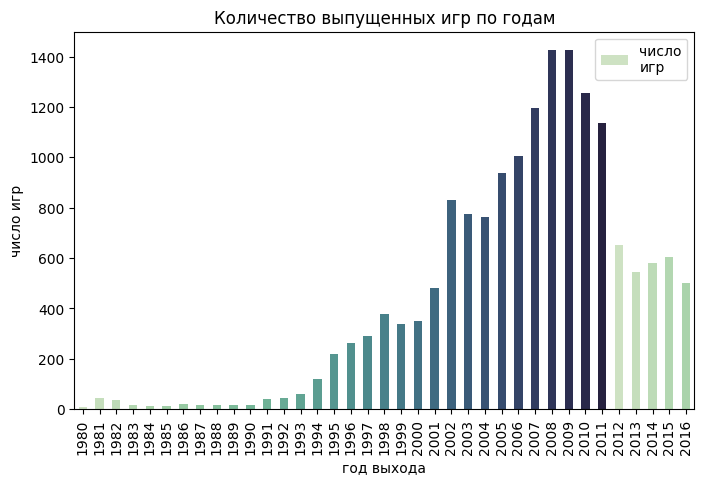

In [40]:
fig, ax = plt.subplots(figsize=(15,6), dpi=100)

games_in_years.plot(kind='bar', x='year_of_release', y='count',
            title='Количество выпущенных игр по годам',
            color=sns.cubehelix_palette(start=.3, rot=-.6,  n_colors=32),
             ylabel='число игр', xlabel='год выхода', figsize=(8, 5), label='число\nигр', ax=ax)

Согласно полученным данным, расцвет игровой индустрии по числу выпущенных продуктов случился во второй половине нулевых годов: максимальные показатели приходятся на 2008 и 2009 годы - на этот период приходится 17% всех игр (8.5% в каждый год, более 1400 наименований), представленных в датафрейме. До этого периода рынок характеризовался неустойчивым ростом: число выпущенных игр в 2002 году (около 830 игр, 5% датафрейма) было превышено только спустя три года, после чего их число ежегодно увеличивалось на 80-100 единиц. Однако, в 2010 году началось снижение числа новых продуктов - вероятно, на этом сказались последствия мирового экономического кризиса. К середине десятых годов игровой бум окончательно прошел: начиная с 2012 года ежегодно на рынке стало появляться от 500 до 650 игр, составляющих 3-4% всех данных. Следовательно, можно говорить о том, что игровая индустрия замерла или нашла оптимальный баланс между количеством и качеством продукции. 

<a id="research_platforms"> </a>
### Изучение и описание динамики продаж по платформам в разные годы

,platform,total_sales,share
16,PS2,1255.77,7.5
28,X360,971.42,5.8
17,PS3,939.65,5.6
26,Wii,907.51,5.4
4,DS,806.12,4.8
15,PS,730.86,4.4
6,GBA,317.85,1.9
18,PS4,314.14,1.9
19,PSP,294.05,1.8
13,PC,259.52,1.6


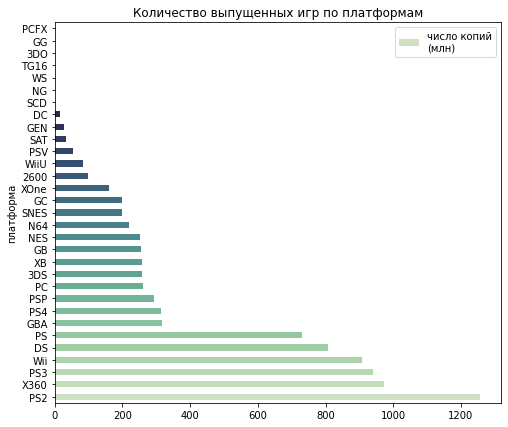

In [41]:
#выберем платформы с наибольшими суммарными продажами

sales_per_platforms = (
    df
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .reset_index()
    .merge((df.pivot_table(index='platform', values='total_sales', aggfunc='sum') /\
            df.shape[0] * 100).round(1), on='platform', how='left')
    .rename(columns = {'total_sales_x':'total_sales', 'total_sales_y': 'share'})
    .sort_values(by='total_sales', ascending=False)
)

display(sales_per_platforms.head(10))

sales_per_platforms.plot(kind='barh', x='platform', y='total_sales',
            title='Количество выпущенных игр по платформам',
            color=sns.cubehelix_palette(start=.3, rot=-.6,  n_colors=25),
             ylabel='проданные копии', xlabel='платформа', figsize=(8, 7), label='число копий\n(млн)');

Неоспоримым лидером по продажам за период 1980-2016 гг. является платформа PlayStation 2, имеющая 1,26 млрд  проданных копий игр по всему миру и 7,5% наименований в датафрейме. Далее идут игровые системы X360, PS3, Wii, DS, а также игры для ПК - на них приходится от 700 млн до почти 1 млн распространенных копий или 4-6% имеющихся данных. Реализация игр на почти половине платформ находится в промежутке от 159 до 318 млн проданных копий. Остальную часть датафрейма занимают консоли с оборотом менее 100 млн проданных копий.

In [42]:
#сохраним в отдельную переменную топ-10 платформ по числу проданных игр

top_ten_platforms = sales_per_platforms['platform'].head(10)
top_ten_platforms

16     PS2
28    X360
17     PS3
26     Wii
4       DS
15      PS
6      GBA
18     PS4
19     PSP
13      PC
Name: platform, dtype: object

In [43]:
#построим таблицу с распределением продаж выпускаемых игр по годам - топ-10 платформ

(
    df
    .query('platform in @top_ten_platforms')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
)

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,0.02,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN


Самой старой платформой, согласно полученным данным, является Nintendo DS, однако, здесь имеется ошибка: платформа вышла на 20 лет позже.

In [44]:
#посмотрим, что это за покемон (Нинтендо же):)

df.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [45]:
#исключаем строку и проверяем результат 

display(f'количество строк до удаления: {df.shape[0]}')

df = df.drop(15957,axis = 0)
    
f'новое количество строк: {df.shape[0]}'

'количество строк до удаления: 16713'

'новое количество строк: 16712'

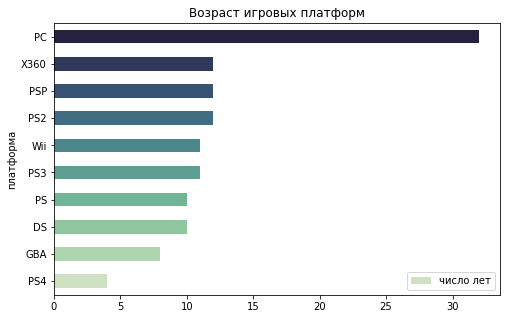

In [46]:
#выведем визуальные данные о возрасте игровых платформ

(  
    df
    .query('platform in @top_ten_platforms')
    .pivot_table(index='platform', values='year_of_release', aggfunc=lambda x: x.max() - x.min() + 1)
    .sort_values(by='year_of_release')
    .plot(kind='barh', y='year_of_release',
            title='Возраст игровых платформ',
            color=sns.cubehelix_palette(start=.3, rot=-.6,  n_colors=10),
             ylabel='проданные копии', xlabel='платформа', figsize=(8, 5), label='число лет')
);

По состоянию на 2016 году,  компьютерные игры находились  на игровом рынке уже более 30 лет: если в 80х годах были проданы практически единичные экземпляры, то уже в 1994 году случился резкий подъем интереса к играм на персональных компьютерах: было продано почти 13 млн копий. Это единственная из топ-10 платформ, которая присутствует во все десятилетия, представленные в датафрейме. 12 лет на момент выгрузки данных просуществовали такие платформы как X360, PSP и PS2 - выпущенные в середине нулевых годов, они пережили пик популярности в течение ближайших 5 лет после выпуска, после чего число проданных копий стало резко снижаться и достигло нулевой или минимальной отметки. Чуть меньший век был отведен платформам Wii, PS3 и DS - 10-11 лет: продажи игр на Nintendo DS прекратились уже в 2014 году, в то время как по состоянию на 2016 год пользователи все еще покупали небольшое число игр для PS3 и Wii, вышедших, впрочем, на два года позже. 10 лет, с 1994 по 2003 год, просуществовала классическая версия PS, и еще меньше - приставка GBA (8 лет). Среди самых популярных по числу проданных копий - на восьмом месте - находится платформа PS4, которая к 2016 году не просуществовала и пяти лет. Таким образом, обобщив полученные данные, можно сделать вывод, что средний срок «жизни» игровой платформы или ее поколения составляет около 10 лет (+-2 года). Исключение составляют персональные компьютеры, однако возможность запуска видеоигр является лишь одной из их возможных опций, в то время как функционал консолей ограничен собственно самими играми. 

<a id="research_period"> </a>
### Bыбор исследуемого периода для построения прогноза на 2017 год

Выбор актуального периода для прогноза будет основываться на двух критериях:
- стабильное состояние периода (отсутствие выбивающихся пиковых моментов или резких снижений);
- наличие актуальных платформ. 

,year_of_release,total_sales
27,2007,604.75
28,2008,671.50
29,2009,658.82
30,2010,590.13
31,2011,507.58
32,2012,355.84
33,2013,361.24
34,2014,331.53
35,2015,267.98
36,2016,129.94


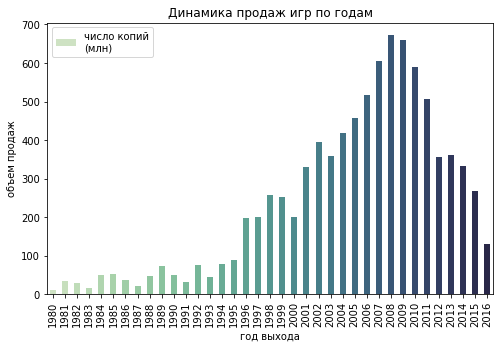

In [47]:
#изучим динамику продаж за весь представленный период 

sales_per_year = df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()

display(sales_per_year.tail(10))

sales_per_year.plot(kind='bar', x='year_of_release', y='total_sales',
            title='Динамика продаж игр по годам',
            color=sns.cubehelix_palette(start=.3, rot=-.6,  n_colors=38),
             ylabel='объем продаж', xlabel='год выхода', figsize=(8, 5), label='число копий\n(млн)');

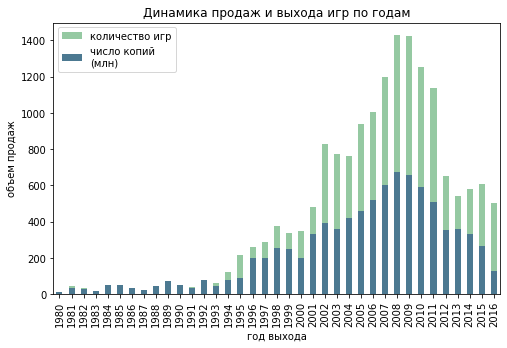

In [48]:
#выявим, есть ли зависимость между появлением новых игр и динамикой продаж

ax =  (df
 .pivot_table(index='year_of_release', values='name', aggfunc='count')
 .plot(kind='bar', y='name',color=sns.cubehelix_palette(start=.3, rot=-.6,)[1], label='количество игр')
      )

sales_per_year.plot(kind='bar', x='year_of_release', y='total_sales',
            title='Динамика продаж и выхода игр по годам',
            color=palette[3],
             ylabel='объем продаж', xlabel='год выхода', figsize=(8, 5), label='число копий\n(млн)', ax=ax);

Из полученных данных хорошо видно, что динамика продаж игр в целом соответствует динамике развития игрового рынка: пиковые значения в обеих столбцах приходятся на 2008-2009 годы. Тем не менее, в последние годы ситуация несколько изменилась: в 2013-2013 годах количество нового продукта стало расти, однако продажи падают.  

,total_sales
year_of_release,
2012,355.84
2013,361.24
2014,331.53
2015,267.98
2016,129.94


'всего продано за период: 1446.5 млн копий'

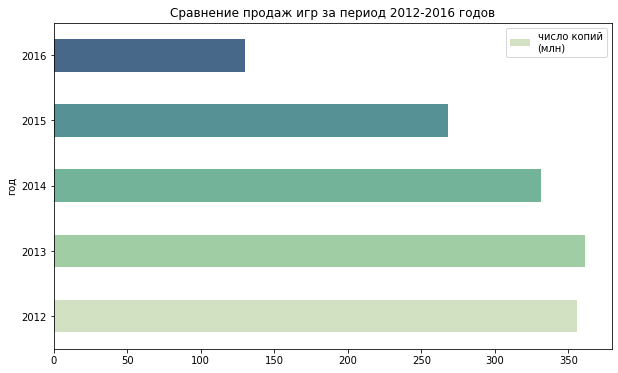

In [49]:
#изучим динамику продаж за период 2012-2016 годов

sales_actual = df.query('year_of_release > 2011').pivot_table(index='year_of_release', 
                                                             values='total_sales', aggfunc='sum')
display(sales_actual)

display(f'всего продано за период: {sales_actual["total_sales"].sum().round(1)} млн копий')
(
    sales_actual
    .plot(kind='barh', title='Сравнение продаж игр за период 2012-2016 годов', y='total_sales', \
         color = sns.cubehelix_palette(start=.6, rot=-.75, n_colors=7), figsize=(10, 6), 
         xlabel='год', ylabel='объем продаж', label='число копий\n(млн)')
);

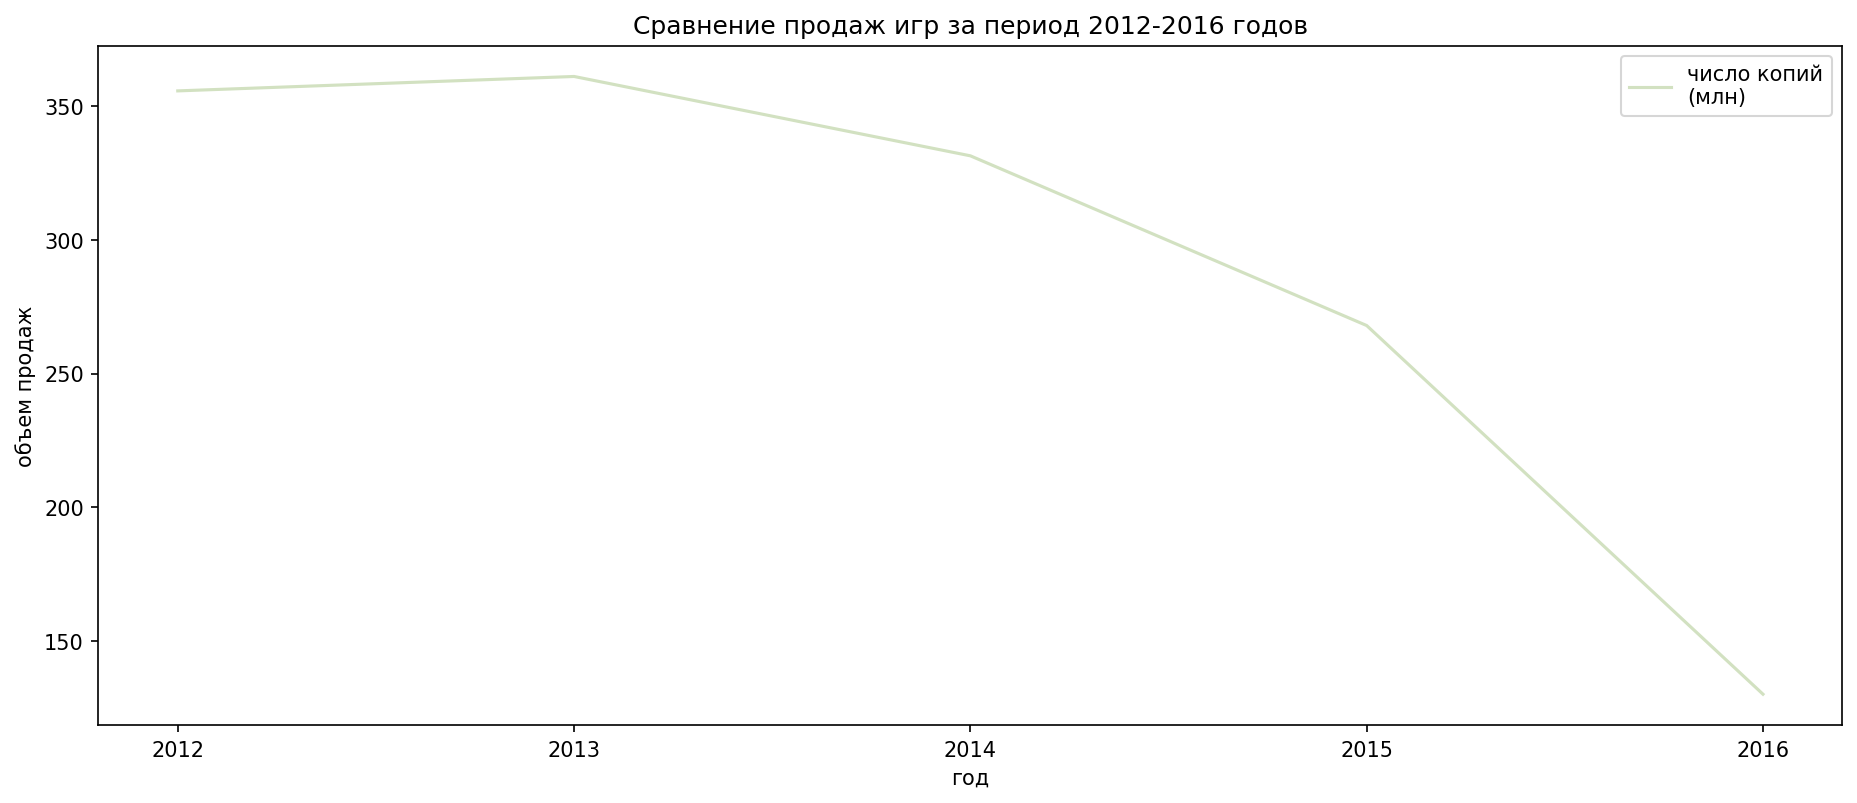

In [50]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,6), dpi=150)

sales_actual \
    .plot(title='Сравнение продаж игр за период 2012-2016 годов', y='total_sales', \
         color = sns.cubehelix_palette(start=.6, rot=-.75, n_colors=7), 
         xlabel='год', ylabel='объем продаж', label='число копий\n(млн)', ax=ax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

За период 2012-2016 годов было продано около 1,5 млрд копий игр по всему миру. Доля продаж на 2012-2014 годы была примерно равна - 23-25%, однако в 2015 году процент продаж за период составил около 19% . Данные за 2016 год, вероятно, неполные, что объясняет столь низкое процентное соотношение, тем не менее, опираясь на данные предыдущих трех лет, можно предположить, что по итогам 2016 года также продолжится снижение. 

Таким образом, по первому критерию предпочтителен период 2012-2016 годов: эти годы характеризуются примерно одинаковым количеством продаж. 

Выявим платформы, которые имеют популярность по состоянию на 2016 год.  Как мы установили ранее, жизненный цикл платформы составляет около 10 лет, следовательно, выберем платформы, появившиеся после 2006 года.

In [51]:
#установим, какие платформы появились после 2006 года

new_platforms = df.pivot_table(index='platform', values='year_of_release', aggfunc='min').\
                reset_index().query('year_of_release > 2006').sort_values(by='year_of_release')
new_platforms_name = new_platforms['platform']

new_platforms_name

2      3DS
20     PSV
27    WiiU
18     PS4
30    XOne
Name: platform, dtype: object

In [52]:
#выведем динамику продаж по платформам после 2006 года

(
    df
    .query('platform in @new_platforms_name')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
)

platform,3DS,PS4,PSV,WiiU,XOne
year_of_release,,,,,
2011,63.20,NaN,4.63,NaN,NaN
2012,51.36,NaN,16.19,17.56,NaN
2013,56.57,25.99,10.59,21.65,18.96
2014,43.76,100.00,11.90,22.03,54.07
2015,27.78,118.90,6.25,16.35,60.14
2016,15.14,69.25,4.25,4.60,26.15


В 2012 году еще не появились такие популярные платформы, как PS4 и XOne, следовательно, границу актуального периода для исследования сдвинем на год, выбрав период 2013-2016 гг. 

<a id="research_benefit"> </a>
### Изучение и выявление потенцально прибыльных платформ

In [53]:
#построим сводную таблицу продаж по платформам за актуальный период 2013-2016 годов

platforms_actual = (
    df
    .query('year_of_release > 2012')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
)
platforms_actual

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [54]:
#исключим из таблицы платформы, для которых нет данных по всему представленному периоду

platforms_actual = platforms_actual.drop(columns = ['DS', 'PSP'], axis = 1) 
platforms_actual

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2013,56.57,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


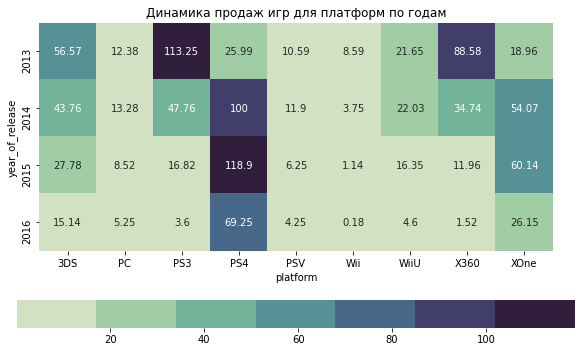

In [55]:
#построим тепловую карту динамики продаж

plt.figure(figsize=(10, 6))
plt.title('Динамика продаж игр для платформ по годам')
sns.heatmap(platforms_actual, 
            annot = True, 
            cmap= sns.cubehelix_palette(start=.6, rot=-.75, n_colors=7), 
            fmt='g',
            cbar_kws= {'orientation': 'horizontal'}, 
            square=True);


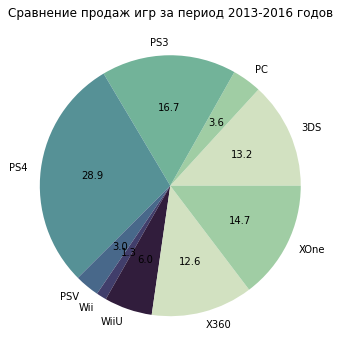

In [56]:
#сравним суммарные продажи по платформам за актуальный период

(
    platforms_actual.sum()
    .plot(kind='pie', title='Сравнение продаж игр за период 2013-2016 годов', autopct='%.1f', \
         colors = sns.cubehelix_palette(start=.6, rot=-.75, n_colors=7), figsize=(10, 6))
)

plt.axis('off')
plt.show()


Таблица продаж за 2013-2016 годы представлена в основном платформами, выпущенными после 2011 года, а также ПК. Самые большие продажи по миру приходятся на систему PS4, единственную из новых консолей вошедшую в число топ-10 наиболее популярных платформ за все время: число продаж игр для PS4 в 2014-2015 годах превышало 100 млн копий, а в 2016 году распространено игр для этой консоли больше, чем на остальные вместе взятые. Второй по популярности платформой за этот период является ее предшественница, PS3, однако, если в 2013 году для этой платформы распространялось более 100 млн копий, то уже в следующем году она устаревшая версия приставки уступила первенство более свежей модели и по итогам 2015 года на PS3 было продано всего 17 млн игр. Эту систему догоняет платформа XOne, демонстрирующая уверенный рост продаж в 2013-2015 годах. Как и в случае с PlayStation, XOne потеснила на рынке игровую систему предыдущего поколения - X360, которая в 2013 году занимала второе место по числу продаж. В числе популярных платформ также можно назвать Nintendo 3DS, на которую приходится 13% продаж за данный период, однако распространение игр для данной платформы стабильно демонстрируют негативную динамику. Доля остальных платформ значительно ниже и не превышает 6 процентов - в их числе система WiiU (6%), сменившая Wii, а также ПК и PSV, которые, несмотря на снижающиеся обороты,  отличаются большей стабильностью, чем их конкуренты. 

Таким образом, потенциально прибыльными платформами можно рассматривать новые поколения консолей PlayStation (PS4) и Xbox (XOne), а также платформу 3DS, и в меньшей степени - WiiU, персональные компьютеры и PSV.


<a id="research_boxplot"> </a>
### Построение и описание диаграммы размаха по глобальным продажам игр в разбивке по платформам

In [57]:
platforms_actual

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2013,56.57,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


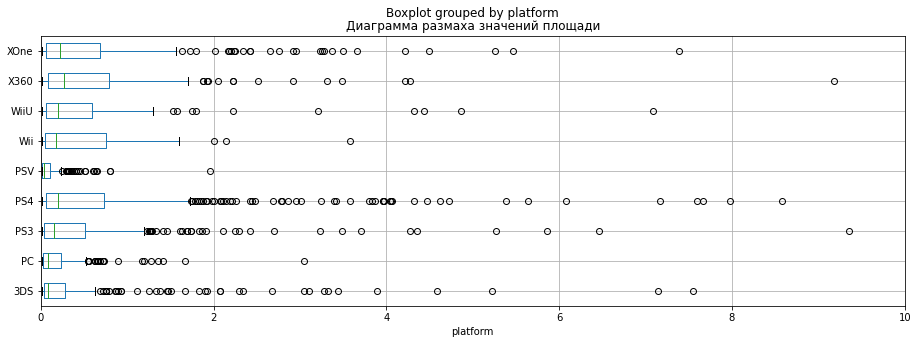

In [58]:
#построим диаграмму размаха и ограничим ее предельное значение по оси Х 10 млн копий, чтобы расширить ящики

fig, ax = plt.subplots(figsize = (15,5))
ax = df.query('year_of_release > 2012 and platform in @platforms_actual').\
    boxplot(column='total_sales', by='platform', vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 10);

In [59]:
#выведем список игр-выбросов от 10 млн

df.query('year_of_release > 2012 and total_sales > 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24


Согласно диаграмме размаха, большая часть игр на любых платформах продается тиражом менее миллиона копий. Также каждый ящик имеет выбросы, что говорит о наличии особо продаваемых игровых хитов для каждой из платформ. Все диаграммы положительную скошенность. Самые большие пиковые значения (продажа большинства игр в объеме примерно 200 тыс. копий) имеют платформы Xbox и PS4. Наиболее популярные игры (т.е. выбросы) в большей степени характеры для системы PS4: достаточно много игр для данной платформы выпущены от 2,5 до 5 млн копий, а также имеется несколько абсолютных хитов с релизом от 6 до 15 млн. За ней следует конкурент из Xbox (XOne), хотя на данной платформе выпущено несколько меньше игр, разошедшихся тиражом от 2,5 млн экземпляров. У предыдущего поколения PlayStation также имеется некое количество игр с хорошими продажами, однако в целом она уступает и PS4, и XOne. Максимальные выбросы у этих трех платформ обеспечивает абсолютный хит 2013 года - Grand Theft Auto V. Кроме того, стоит отметить платформу 3SD: хотя на ней реализуется не так много популярных игр, тем не менее, именно эта платформа является основной для огромной массы любителей игр про Пикачу и прочих покемонов. 

<a id="research_one_platform"> </a>
### Изучение и описание влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков, построение диаграммы рассеивания, выявление корреляции

Согласно данным, наиболее популярной платформой в период 2013-2015 годов является PS4.

In [60]:
#создадим отдельную переменную для игр PS4
#переведем оценки пользователей в 100-балльную систему для возможности сравнения двух видов оценки

PS4_score = df.query('platform == "PS4"')[['name', 'user_score', 'critic_score', 'total_sales']]
PS4_score['user_score'] = PS4_score['user_score'] * 10
PS4_score

,name,user_score,critic_score,total_sales
31,Call of Duty: Black Ops 3,NaN,NaN,14.63
42,Grand Theft Auto V,83.0,97.0,12.62
77,FIFA 16,43.0,82.0,8.58
87,Star Wars Battlefront (2015),NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,57.0,83.0,7.66
...,...,...,...,...
16500,Root Letter,75.0,69.0,0.01
16503,Shin Hayarigami 2,NaN,NaN,0.01
16526,Dungeons 2,79.0,61.0,0.01
16530,Carmageddon: Max Damage,55.0,51.0,0.01


In [61]:
#выведем корреляцию между оценкой пользователей, оценками критиков и продажами 

PS4_score[['user_score','critic_score']].corrwith(PS4_score['total_sales']).round(2)

user_score     -0.03
critic_score    0.41
dtype: float64

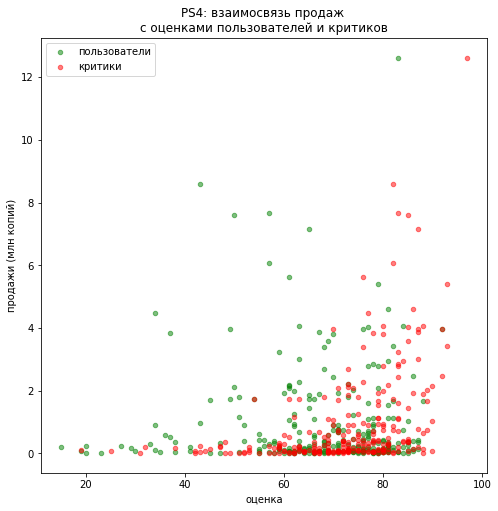

In [62]:
#построим диаграмму распределения 

ax = PS4_score.plot(kind='scatter', 
        y='total_sales' , x='user_score', alpha=0.5, 
                         figsize=(4,6), color='g', 
                         label='пользователи')

PS4_score.plot(kind='scatter', 
        y='total_sales' , x='critic_score', alpha=0.5, figsize=(8,8), 
                      color='r',
                      xlabel='оценка', ylabel='продажи (млн копий)', ax=ax, 
                      title='PS4: взаимосвязь продаж \nс оценками пользователей и критиков',
                      label='критики');

На диаграмме распределения хорошо заметно, что оценки критиков ниже 60 баллов практически не стимулируют пользователей к покупке игр. Начиная примерно с оценки экспертов в 60 баллов улучшается динамика продаж игр: самые продаваемые тайтлы (от 2 млн) получают оценку от 75 баллов. 
Большинство пользователей в целом солидарны с мнением профессионалов, однако пользовательская оценка более рассредоточенная: игры, число продаж которых находится в промежутке 2-10 млн копий имеют как средний (30-65), так и высокий рейтинг, совпадающий с оценками критиков. Также, судя по всему, пользователи чаще оставляют негативные оценки, и реже - высокие. Например, самую продаваемую игру критики оценили крайне высоко - почти на 100 баллов, но игроки не дали ей более 85. Соответственно, корреляция между продажами и мнением пользователей практически отсутсвует, в то время как с мнением экспертов составляет около 41%. Некое число игр, крайне высоко оцененных критиками и пользователями, пока не взлетели в продажах, возможно, по причине их новизны. Следовательно, именно оценка экспертов в большей степени определяет популярность игры, чем оценка непосредственных игроков, однако особо сильная зависимость между продажами и рейтингом отсутствует.


<a id="research_another_platform"> </a>
### Соотнесение полученных выводов с продажами игр на других платформах

In [63]:
#создадим отдельную переменную для игр конкурента PS4 - XOne
#переведем оценки пользователей в 100-балльную систему для возможности сравнения двух видов оценки

xone_score = df.query('platform == "XOne"')[['name', 'user_score', 'critic_score', 'total_sales']]
xone_score['user_score'] = xone_score['user_score'] * 10
xone_score.head(5)

,name,user_score,critic_score,total_sales
99,Call of Duty: Black Ops 3,NaN,NaN,7.39
165,Grand Theft Auto V,79.0,97.0,5.47
179,Call of Duty: Advanced Warfare,54.0,81.0,5.26
242,Halo 5: Guardians,64.0,84.0,4.49
270,Fallout 4,62.0,88.0,4.22


In [64]:
#выведем корреляцию между оценкой пользователей, оценками критиков и продажами 

display(xone_score['user_score'].corr(xone_score['total_sales']))
xone_score['critic_score'].corr(xone_score['total_sales'])

-0.06892505328279411

0.4169983280084017

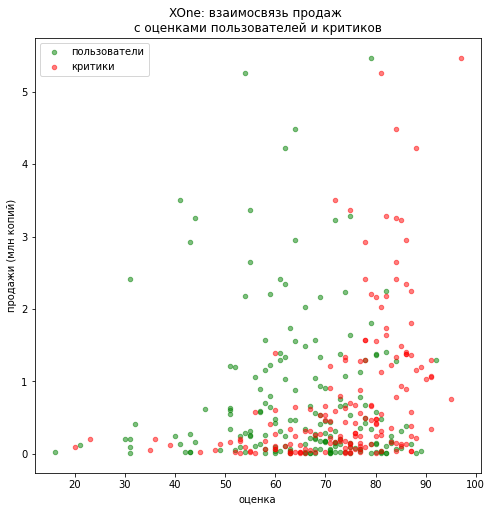

In [65]:
#построим диаграмму распределения для платформы XOne

ax = xone_score.plot(kind='scatter', 
        y='total_sales' , x='user_score', alpha=0.5, 
                         figsize=(4,6), color='g', 
                         label='пользователи')

xone_score.plot(kind='scatter', 
        y='total_sales' , x='critic_score', alpha=0.5, figsize=(8,8), 
                      color='r',
                      xlabel='оценка', ylabel='продажи (млн копий)', ax=ax, 
                      title='XOne: взаимосвязь продаж \nс оценками пользователей и критиков',
                      label='критики');

Диаграмма распределения за период 2013-2016 годов по всем платформам, кроме PS4, в значительной степени подтверждает выводы, сделанные для одной игровой системы. Вновь самые высокие продажи у игр, которые получили оценку выше средней от экспертов, основная масса оценок пользователей находится в среднем диапазоне. Корреляция между продажами и мнением пользователей вновь практически отсутствует, в то время как с мнением экспертов составляет похожие 42%. 



<a id="research_benefit_platforms"> </a>
### Изучение и описание общего распределения игр по жанрам, в том числе исходя из критериев прибыльности и продаж

,total_sales
genre,
Adventure,0.030
Puzzle,0.060
Strategy,0.080
Simulation,0.100
Action,0.110
Misc,0.115
Racing,0.120
Role-Playing,0.120
Fighting,0.130


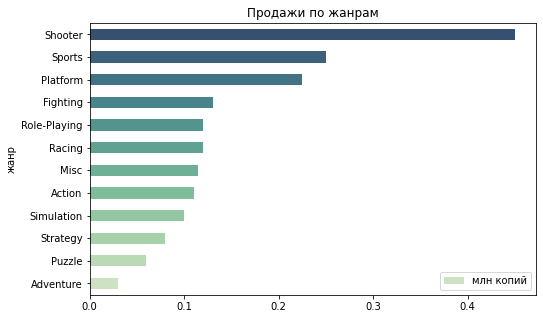

In [66]:
#построим таблицу и график продаж по жанрам за актуальный период
actual_platforms_years = df.query('platform in @platforms_actual and year_of_release > 2012')

genres_actual = actual_platforms_years.\
    pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales')

display(genres_actual)

genres_actual.plot(kind='barh', y='total_sales',
            title='Продажи по жанрам',
            color=sns.cubehelix_palette(start=.3, rot=-.6,  n_colors=15),
             ylabel='проданные копии', xlabel='жанр', figsize=(8, 5), label='млн копий')
plt.legend(loc=4);

Самым популярным жанром игр, выходивших в период 2013-2016 годов, согласно медианным значениям, является шутер: на него приходится около полумиллиона копий. Далее идут спортивные игры и платформеры, отставая почти в 2 раза. Большинство игр в остальных жанрах имеют медианные продажи чуть более 100 тысяч. Хуже всего продаются стратегии, паззлы, а также приключенческие игры.  Можно сделать вывод, что большинство геймеров предпочитают именно динамичные игры на быструю реакцию, в то время как игры с более логическим и стратегическим уклоном вызывают наименьший интерес. 

**Вывод по этапу.**


Рынок игровой индустрии начал бурный подъем с началом нулевых годов. Пиковые значения появления новых игр пришлись на 2008-2009 годы, после чего число новых наименований снизилось и начиная  с 2012 года остановилось на стабильной отметке. 
Самыми популярными платформами по продажам игр за весь период времени являются PS2, X360, PS3, Wii, DS, а также ПК.

Средний период «жизни» игровой платформы или ее поколения составляет около 10 лет. Единственная неизменная платформа, существующая с 80х годов - это персональные компьютеры. 

В качестве актуального периода выбраны 2013-2016 годы, отличающиеся наличием наиболее свежих платформ, а также стабильным положением на игровом рынке.

Потенциально прибыльными платформами являются новые поколения консолей PlayStation (PS4) и Xbox (XOne), а также платформа 3DS. Системы WiiU, персональные компьютеры и PSV также пользуются спросом, но уже в меньшей степени. Это подтверждают результаты и диаграммы размаха.

Наиболее популярной и продаваемой платформой в актуальный период является PS4. Оценки экспертов данной платформы в большей степени влияют на продажу игр, чем рейтинги пользователей. Это же справедливо и для остальных платформ.

Наиболее актуальные жанры - шутеры, спорт и платформеры, отличающиеся динамикой и погружением. Стратегические и логические игры не популярны у пользователей. 

<a id="regions"> </a>
## Составление портрета пользователя каждого региона (Северная Америка, Европа, Япония)

<a id="regions_platforms"> </a>
### Выявление самых популярных платформ (топ-5), описание различия в долях продаж

In [67]:
#cоставим сводную таблицу и круговые диаграммы по продажам по платформам в каждом регионе

region_platforms = df.query('platform in @platforms_actual and year_of_release > 2012').\
    pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
display(region_platforms)


,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
PC,25.36,0.00,11.11
PS3,67.81,23.35,63.50
PS4,141.09,15.96,108.74
PSV,6.10,18.59,5.04
Wii,5.93,0.05,6.56
WiiU,19.85,10.88,29.21
X360,42.52,0.51,81.66
XOne,51.59,0.34,93.12


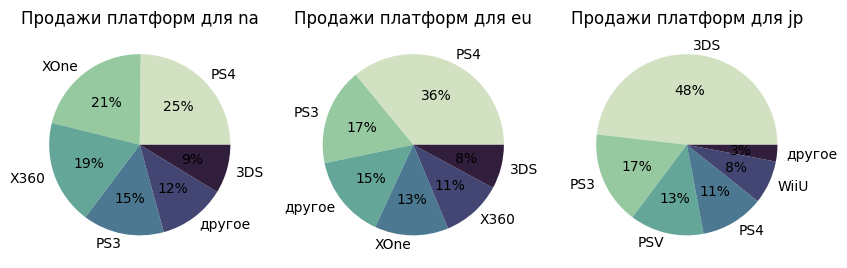

In [68]:
#cоставим круговые диаграммы по продажам по платформам в каждом регионе

fig, axes = plt.subplots(1,3,figsize=(10,3), dpi=100)

for region, ax in zip(['na_sales','eu_sales','jp_sales'], axes.flat):
    data_to_plot = df.query('year_of_release > 2012') \
                        .groupby('platform') \
                        .agg({region : 'sum'}) \
                        .sort_values(by=region, ascending=False) \
                        .reset_index()
    data_to_plot.loc[~data_to_plot['platform'].isin(data_to_plot['platform'].head()), 'platform'] = 'другое'
    data_to_plot.groupby('platform').agg({region : 'sum'}).sort_values(by=region, ascending=False) \
        .plot(kind='pie', ax=ax, y=region, autopct='%.0f%%', legend=False,colors=palette)
    ax.set_title('Продажи платформ для {}'.format(region.split('_')[0]))
    ax.set_ylabel('')

Абсолютным лидером по продажам игр в Европе является платформа PS4 – на нее приходится 36% игр или 141 млн копий за период 2013-2016 годов. На второй позиции разместилась ее предшественница – PS3 (17%, 68 млн копий). Несколько меньшую долю занимают игры на платформе Xbox – 13% продаж в европейском регионе приходится на систему XOne и на 2% меньше – на платформу предыдущего поколения. 5-7 % продаж приходится на компьютерные игры, игры на консолях 3DS и WiiU. Наименее популярными платформами являются Wii и PSV.
Ситуация на американском игровом рынке несколько отличается: примерно равные доли продаж приходятся на наиболее актуальных представителей PlayStation и Xbox (25 и 21% соответственно, 109 и 93 млн копий). На последующих позициях расположены их предшественники: 19% - X360 и 14,5% - PS3. Относительно невысокие доли продаж имеют игры для консолей 3DS и WiUU (9 и 7% соответственно), в то время как остальные системы представлены 1-2,5%.

Наибольшим образом отличается рынок видеоигр в Японии, где половина продаваемых копий (68 млн) приходятся на японскую платформу Nintendo 3DS. В отличие от Европы и Америки, PS4 еще не успела завоевать столь большой популярности: ее все еще опережает система предыдущего поколения (12 и 17% соответственно). Для Японии также характерна более высокая доля игр для консоли PSV – почти 14%. Популярность приставки WiiU практически сопоставима с другими регионами, но наибольшем отличием являются нулевые продажи компьютерных игр и практически нулевые – игр для платформ Xbox. Вероятно, для столь популярных систем отсутствуют полные данные, но поиск в Интернете подтвердил, что, в частности, в 2016 году платформы Xbox [не пользовались благосклонностью японских покупателей](https://lifeinjapan.ru/article/show/9508). Также отметим, что основные продажи приходятся именно на рынки Европы и Америки: за исключением систем 3DS и PSV в Японии реализация игр для остальных платформ находится на более низком уровне. 


<a id="regions_genres"> </a>
### Выявление самых популярных жанров (топ-5), описание различия

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Adventure,8.25,5.82,7.14
Fighting,8.55,7.65,15.55
Misc,20.04,9.20,27.49
Platform,15.58,4.79,18.14
Puzzle,1.00,1.18,0.83
Racing,20.19,2.30,12.96
Role-Playing,36.97,51.04,46.40
Shooter,87.86,6.61,109.74


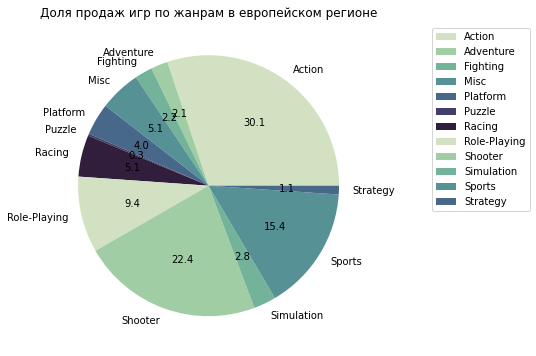

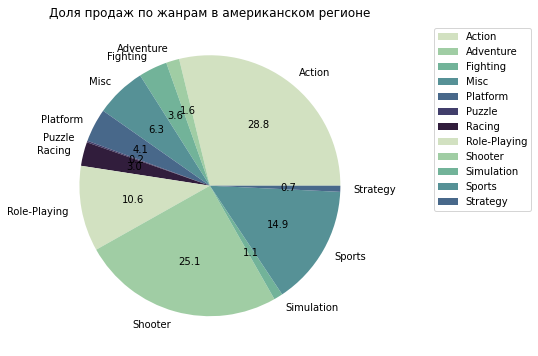

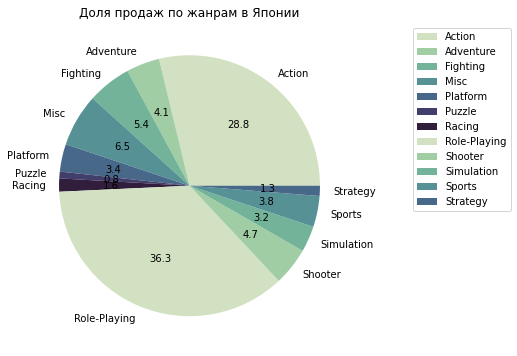

In [69]:
#cоставим сводную таблицу и круговые диаграммы по продажам по жанрам в каждом регионе

region_genres = df.query('year_of_release > 2012').\
pivot_table(index='genre', 
            values=['na_sales', 'eu_sales', 'jp_sales'], 
            aggfunc='sum')
display(region_genres)


(
    region_genres
    .plot(kind='pie', y='eu_sales', 
          title='Доля продаж игр по жанрам в европейском регионе', 
          autopct='%.1f', 
           colors = sns.cubehelix_palette(start=.6, rot=-.75, n_colors=7), 
          figsize=(10, 6))
)

plt.legend(bbox_to_anchor=(1.5, 1), ncol=1)
plt.axis('off')

(
    region_genres
    .plot(kind='pie', 
          y='na_sales', 
          title='Доля продаж по жанрам в американском регионе', 
          autopct='%.1f', 
          colors = sns.cubehelix_palette(start=.6, rot=-.75, n_colors=7), 
          figsize=(10, 6))
)

plt.legend(bbox_to_anchor=(1.5, 1), ncol=1)
plt.axis('off')

(
    region_genres
    .plot(kind='pie', 
          y='jp_sales', 
          title='Доля продаж по жанрам в Японии', 
          autopct='%.1f', 
          colors = sns.cubehelix_palette(start=.6, rot=-.75, n_colors=7), 
          figsize=(11, 6))
)

plt.legend(bbox_to_anchor=(1.5, 1), ncol=1)
plt.axis('off');

Тенденции продаж игр по жанрам в Америке и Европе не слишком отличаются от общемировых: абсолютным лидером является жанр экш, на который приходится около 30% продаж: 118 млн. копий в Европе, 126 млн. – в Америке и 41 млн. – в Японии, а на втором и третьем месте в Европе и Америке находятся шутеры и спортивные игры: их доли составляют около 25 и 15%. Абсолютными аутсайдерами в обеих регионах являются паззлы, а в число наименее популярных жанров (менее 3% от общей доли продаж) – приключения, стратегии и симуляторы, а в Европе – также бойцовые игры, чуть более популярные в Америке. Японцы, в свою очередь, в большей степени предпочитают экшену ролевые игры (36 и 29 % / 51 и 41 млн соответственно). Наименьшие предпочтения в стране восходящего солнца отдают стратегиям, паззлам и гонкам – на их доли приходится менее 2%. Остальные игровые жанры на рынке распределены относительно равномерно. 

<a id="regions_rating"> </a>
### Выявление влияния рейтинга ESRB на продажи в отдельном регионе

In [70]:
#создадим заглушки

df['rating'] = df['rating'].fillna('нет рейтинга')
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,нет рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,нет рейтинга,31.38


,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
нет рейтинга,78.91,85.05,89.42


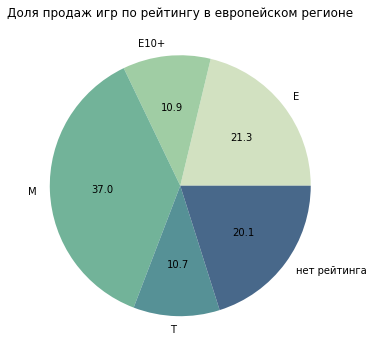

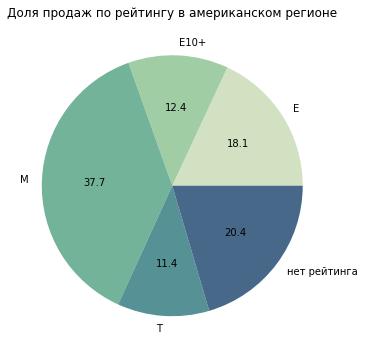

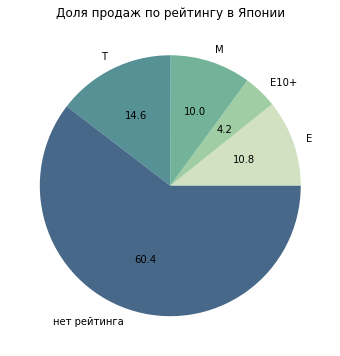

In [71]:
#cоставим сводную таблицу и круговые диаграммы по продажам по рейтингам в каждом регионе

region_rating = df.query('year_of_release > 2012').\
pivot_table(index='rating', 
            values=['na_sales', 'eu_sales', 'jp_sales'], 
            aggfunc='sum')
display(region_rating)

(
    region_rating
    .plot(kind='pie', 
          y='eu_sales', 
          title='Доля продаж игр по рейтингу в европейском регионе', 
          autopct='%.1f', 
          colors = sns.cubehelix_palette(start=.6, rot=-.75, n_colors=7), 
          figsize=(10, 6), legend=None)
)

plt.axis('off')

(
    region_rating
    .plot(kind='pie', 
          y='na_sales', 
          title='Доля продаж по рейтингу в американском регионе', 
          autopct='%.1f', 
          colors = sns.cubehelix_palette(start=.6, rot=-.75, n_colors=7), 
          figsize=(10, 6), legend=None)
)

plt.axis('off')

(
    region_rating
    .plot(kind='pie', 
          y='jp_sales', 
          title='Доля продаж по рейтингу в Японии', 
          autopct='%.1f', 
          colors = sns.cubehelix_palette(start=.6, rot=-.75, n_colors=7), 
          figsize=(11, 6), legend=None)
)

plt.axis('off');

Что касается рейтинга, продажи в Европе и Америке имеют одинаковую тенденцию: 37% проданных копий приходится на игры с рейтингом М (для лиц старше 17 лет) – в Европе оборот таких игр составляет 146 млн. копий, в Америке – 165 млн. На втором месте идут игры, для которых не установлен рейтинг: на них приходится пятая чать данных. Игры «семейного» формата (рейтинг Е) занимают стабильное третье место с оборотом более 80 млн. копий и долей 18-21%. Примерно равные доли (11-12%) имеют продажи игр с рейтингами Т и Е10+. Японский рынок вновь не соответствует западным трендам: рейтинг самых востребованных игр в этой стране, к сожалению, определить не удастся: 60% данных отсутствует. 15% игр имеют рейтинг Т (для подростков): на них приходится 21 млн копий. Игры с рейтингом «для всех» и преобладающие в Европе игры с рейтингом 17+ или М пользуются примерно одинаковой популярностью. Наименьшая доля (4,2%) приходится на продукты с рейтингом Е10+, несмотря на лидирующие позиции близкого к данному рейтингу возрастного ценза Т. 

**Вывод по этапу.** 
Портрет пользователей из Европы и Америки похож между собой: геймеры из западных стран предпочитают игры на платформах PS (3/4) и Xbox (One/360) в жанрах экшен, шутер или спорт, имеющие рейтинг для взрослых. Японцы, напротив, верны локальному бренду Нинтендо (3DS), играя в ролевые и экшн игры, доступные для пользователей подросткового возраста, однако рейтинг большинства игр, выходящих в Японии, неизвестен.

<a id="hypotheses"> </a>
## Формулирование и проверка гипотез

<a id="first_hypothesis"> </a>
### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки гипотезе о равенстве средних пользовательских рейтингов двух платформ используем метод st.ttest_ind, с помощью которого можно проверить средние двух совокупностей. Нулевая гипотеза такого теста - средние значения равны. 

- H_0: средние пользовательские рейтинги платформы XOne = средние пользовательские рейтинги платформы PC
- H_1: средние пользовательские рейтинги платформы XOne ≠ средние пользовательские рейтинги платформы PC

Установим alpha на значение 0.05: количество строк в датафрейме, имеющих данные о пользовательском рейтинге не так велико, чтобы значитетельно занижать уровень значимости. 

В настоящий момени компьютерные игры не столь популярны, как игры на приставках, однако Xbox One только набирает обороты и, вероятно, его рейтинги могут быть схожи с рейтигами PC, проверим эту гипотезу. 

In [72]:
#применим метод для сравнения рейтингов платформ

pc = df.query('year_of_release > 2012 and platform == "PC" and not user_score.isna()')['user_score']
xone = df.query('year_of_release > 2012 and platform == "XOne" and not user_score.isna()')['user_score']

alpha = .05

results = st.ttest_ind(pc, xone, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Альтернативная гипотеза не подтвердилась.

<a id="second_hypothesis"> </a>
### Гипотеза 2: средние пользовательские рейтинги жанров Action и Sports разные



- H_0: средние пользовательские рейтинги жанра Action = средние пользовательские рейтинги жанра Sports
- H_1: средние пользовательские рейтинги жанра Action ≠ средние пользовательские рейтинги жанра Sports

alpha = 0.05

Спортивный жанр достаточно популярен и входит в топ-3 самых продаваемых игр, однако экшн-игры также востребованны следовательно, их рейтинги могут быть схожи. 

In [73]:
#применим метод для сравнения рейтингов жанров

action = df.query('year_of_release > 2012 and genre == "Action" and not user_score.isna()')['user_score']
sports = df.query('year_of_release > 2012 and genre == "Sports" and not user_score.isna()')['user_score']

alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False)

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

2.71298150742516e-20
Отвергаем нулевую гипотезу


Пользователи явно предпочитают один из этих жанров другому. Нулевая гипотеза не подтверждена.

**Вывод по этапу**. С помощью метода st.ttest_ind осуществена проверка средних значений двух совокупностей: рейтингов жанров Action и Sports, а также рейтингов платформ PC и XOne. Гипотеза о возможном равенстве средних пользовательских рейтингов платформ получила подтверждение по итогам проведенного теста, в то время как гипотеза о равенстве рейтингов жанров была опровергнута.

<a id="conclusion"> </a>
## Общий вывод и рекомендации по итогам исследования

В исторической перспективе рынок игровой индустрии начинает постепенный рост с середины 90х годов, переживает бурный подъем в новом тысячелетии и достигая максимальных показателей по продажам и числу выпущенных игр в 2008-2009 годах. На это время приходится популярность платформ PS2, X360, PS3, Wii, DS, а также игр для ПК. 

С начала двух тысяча десятых годов рынок начал стагнировать: общемировые продажи замирают на уровне около 350 млн копий в год, а число новых релизов - не более 400 тайтлов. 

В начале 10-х годов заканчивается **жизненный цикл (равный**, как установлено в исследовании, **около 10 лет**) популярных ранее платформ: им на смену приходят новые поколения, такие как PS4, XOne, WiiIU. 

Благодаря появлению новых платформ и стабильной ситуации на игровом рынке **период 2013-2016 годов** был выбран в качестве актуального. По итогам проведенного анализа данных по видеоиграм за этот период выявлены следующие закономерности, по которым можно сделать некоторые рекомендации для определния потенциально популярного продукта и планирования рекламных кампаний.

1) Наиболее перспективными платформами для продаж видеоигр являются **новые поколения консолей PlayStation (PS4) и Xbox (XOne)**, а также платформу 3DS. PS4 занимает особое место среди этих платформ ввиду высоких объемов продаж (8-е место среди платформ за весь период времени) несмотря на свою относительную молодость: в актуальном периоде на данную систему приходится около 30% всех продаж или более 300 млн. копий. WiiU, персональные компьютеры и PSV, хотя не пользуются такой популярностью, также стабильно имеют своего пользователя. 

2) Для прогнозирования продаж тех или иных игр следует опираться в большей степени на **оценки критиков**: например, для платформ и XOne PS4 корреляция между рейтингом экспертов и продажами по шкале Чеддока является умеренной (более 40%),  в то время как для пользовательского рейтинга она почти отсутствует. В частности, пользователи предпочитают чаще давать средние оценки играм с относительными уровнями продажи. Для оценки рейтингов особенно подходит метод st.ttest_ind, который позволяет наглядно сравнивать средние значения по выборкам: в частности, с его помощью установлено, что средние пользовательские рейтинги платформ Xbox One и PC с большой долей вероятности одинаковые, а пользовательские рейтинги жанров Action и Sports - отличаются.

3) Приоритет в продаже игр следует отдать **активным динамичным жанрам** - шутеры, спорт, платформеры: именно их доли преобладают сегодня на рынке. Играм логического характера (паззлы, стратегии, симуляторы) стоит отвести значительное меньшее внимание ввиду их глобальной непопулярности. 

4) При продаже игр следует **учесть региональные особенности**: европейские и американские пользователи похожи в своем игровом менталитете и именно они определяют глобальные тенденции (популярность платформ, жанров) ввиду значимой доли  рынка. В частности, типичных западных пользователей интересуют платформы PS и Хbox (в большей степени их новые поколения) - на них приходится более половины продаж на данных рынках, игры преимущественно с высоким возрастным рейтингом  М (или в меньшей степени - Е, для всех возрастов) в жанрах экшн, «стрелялки» и спорт. Самые востребованные игры в Японии не отмечены рейтингом или имеют рейтинг Т (для подростков) или Е, а неоспоримый приоритет среди платформ имеет Нинтендо 3DS, занимающая 49% местного рынка. В отличие от запада, в Японии непопулярны платформы Xbox, в то время как PS пользуется большим спросом. Предпочтения в играх у японских геймеров также несколько отличаются: на первом месте идут ролевые игры, и только затем - экшн. 
